<a href="https://colab.research.google.com/github/gan1014/Hackathon_project/blob/main/face_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cmake
!pip install dlib
!pip install face-recognition
!pip install opencv-python-headless
!pip install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=cfa23642a2922e23472fb4715fc98202bb3dfe6a565db20ecaf620d768e197b8
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Cell 1: Check uploaded files

import os

print("🔍 Checking uploaded files...\n")

# Check if dataset folder exists
if os.path.exists("dataset"):
    print("✅ 'dataset' folder found!\n")

    # List all people in dataset
    people = [d for d in os.listdir("dataset") if os.path.isdir(os.path.join("dataset", d))]

    if people:
        print(f"📊 Found {len(people)} people in dataset:\n")

        for person in people:
            person_path = os.path.join("dataset", person)
            images = [f for f in os.listdir(person_path)
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            print(f"   👤 {person}:")
            print(f"      Total images: {len(images)}")

            if len(images) < 3:
                print(f"      ⚠️  Warning: Only {len(images)} images. Add at least 3!")
            else:
                print(f"      ✅ Good! {len(images)} images found")

            for img in images:
                print(f"         - {img}")
            print()
    else:
        print("❌ No person folders found inside 'dataset'!")
        print("   Create folders like: dataset/harish/, dataset/minnu/")
else:
    print("❌ 'dataset' folder NOT found!")
    print("   Please upload it using the folder upload button on the left")

print("-" * 60)

# Check test_images folder
if os.path.exists("test_images"):
    print("\n✅ 'test_images' folder found!\n")

    test_images = [f for f in os.listdir("test_images")
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"   Total test images: {len(test_images)}")
    for img in test_images:
        print(f"      - {img}")
else:
    print("\n❌ 'test_images' folder NOT found!")
    print("   Please upload it")

print("\n" + "=" * 60)

if os.path.exists("dataset") and people and os.path.exists("test_images"):
    print("✅ Everything looks good! Ready to proceed!")
else:
    print("⚠️  Please fix the issues above before continuing")



🔍 Checking uploaded files...

✅ 'dataset' folder found!

📊 Found 4 people in dataset:

   👤 ham:
      Total images: 4
      ✅ Good! 4 images found
         - WhatsApp Image 2026-01-22 at 7.17.04 AM.jpeg
         - WhatsApp Image 2026-01-22 at 7.17.05 AM (1).jpeg
         - WhatsApp Image 2026-01-22 at 7.17.04 AM (1).jpeg
         - WhatsApp Image 2026-01-22 at 7.17.05 AM.jpeg

   👤 gann:
      Total images: 5
      ✅ Good! 5 images found
         - WhatsApp Image 2026-01-22 at 7.15.11 AM.jpeg
         - WhatsApp Image 2026-01-22 at 7.15.10 AM.jpeg
         - WhatsApp Image 2026-01-22 at 7.15.10 AM (1).jpeg
         - WhatsApp Image 2026-01-22 at 7.15.11 AM (1).jpeg
         - WhatsApp Image 2026-01-22 at 7.15.11 AM (2).jpeg

   👤 mani:
      Total images: 5
      ✅ Good! 5 images found
         - WhatsApp Image 2026-01-22 at 7.16.11 AM.jpeg
         - WhatsApp Image 2026-01-22 at 7.16.12 AM.jpeg
         - WhatsApp Image 2026-01-22 at 7.16.11 AM (2).jpeg
         - WhatsApp Image 2026

In [4]:
# Cell 2: Install libraries (ONLY RUN ONCE)

print("📦 Installing required libraries...")
print("This will take 1-2 minutes...\n")

!pip install -q cmake
!pip install -q dlib
!pip install -q face-recognition
!pip install -q opencv-python-headless
!pip install -q pillow

print("\n✅ All libraries installed successfully!")
print("✅ Ready to start face recognition!")

📦 Installing required libraries...
This will take 1-2 minutes...


✅ All libraries installed successfully!
✅ Ready to start face recognition!


In [5]:
# Cell 3: Face Recognition System

import face_recognition
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

class SimpleFaceRecognition:
    def __init__(self):
        self.known_faces = []
        self.known_names = []

    def load_training_data(self, dataset_path="dataset"):
        """Load all training images"""
        print("📚 Loading training data...")
        print("-" * 60)

        total_loaded = 0

        # Loop through each person's folder
        for person_name in os.listdir(dataset_path):
            person_folder = os.path.join(dataset_path, person_name)

            if not os.path.isdir(person_folder):
                continue

            print(f"\n👤 Loading: {person_name}")
            loaded_count = 0

            # Loop through images
            for image_file in os.listdir(person_folder):
                if not image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    continue

                image_path = os.path.join(person_folder, image_file)

                try:
                    # Load image
                    img = face_recognition.load_image_file(image_path)

                    # Get face encoding
                    encodings = face_recognition.face_encodings(img)

                    if len(encodings) > 0:
                        self.known_faces.append(encodings[0])
                        self.known_names.append(person_name)
                        loaded_count += 1
                        total_loaded += 1
                        print(f"   ✅ {image_file}")
                    else:
                        print(f"   ⚠️  {image_file} - No face found")

                except Exception as e:
                    print(f"   ❌ {image_file} - Error: {e}")

            print(f"   Total: {loaded_count} images loaded for {person_name}")

        print("\n" + "=" * 60)
        print(f"✅ Training complete!")
        print(f"📊 Total: {total_loaded} images loaded")
        print(f"👥 People: {', '.join(set(self.known_names))}")
        print("=" * 60 + "\n")

        return total_loaded > 0

    def recognize_image(self, image_path):
        """Recognize faces in an image"""
        print(f"\n🔍 Analyzing: {image_path}")
        print("-" * 60)

        # Load test image
        test_img = face_recognition.load_image_file(image_path)

        # Find faces
        face_locations = face_recognition.face_locations(test_img)
        face_encodings = face_recognition.face_encodings(test_img, face_locations)

        print(f"👥 Found {len(face_locations)} face(s)\n")

        # Convert to PIL for drawing
        pil_img = Image.fromarray(test_img)
        draw = ImageDraw.Draw(pil_img)

        results = []

        # Check each face
        for i, (face_location, face_encoding) in enumerate(zip(face_locations, face_encodings), 1):

            # Compare with known faces
            matches = face_recognition.compare_faces(self.known_faces, face_encoding, tolerance=0.5)
            distances = face_recognition.face_distance(self.known_faces, face_encoding)

            name = "Unknown"
            confidence = 0

            if len(distances) > 0 and True in matches:
                best_match_idx = np.argmin(distances)
                if matches[best_match_idx]:
                    name = self.known_names[best_match_idx]
                    confidence = (1 - distances[best_match_idx]) * 100

            # Draw box
            top, right, bottom, left = face_location
            color = "green" if name != "Unknown" else "red"

            draw.rectangle([(left, top), (right, bottom)], outline=color, width=3)
            draw.rectangle([(left, bottom - 35), (right, bottom)], fill=color)

            text = f"{name} ({confidence:.0f}%)" if name != "Unknown" else "Unknown"
            draw.text((left + 6, bottom - 30), text, fill="white")

            # Print result
            status = "✅" if name != "Unknown" else "❌"
            print(f"{status} Face {i}: {name}", end="")
            if confidence > 0:
                print(f" (Confidence: {confidence:.1f}%)")
            else:
                print()

            results.append({"name": name, "confidence": confidence})

        # Show image
        print("\n" + "=" * 60)
        plt.figure(figsize=(12, 8))
        plt.imshow(pil_img)
        plt.axis('off')
        plt.title("Face Recognition Result", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        return results

# Create system
print("🚀 Creating Face Recognition System...")
fr = SimpleFaceRecognition()
print("✅ System ready!")

🚀 Creating Face Recognition System...
✅ System ready!


In [6]:
# Cell 4: Load training data

success = fr.load_training_data("dataset")

if success:
    print("🎉 Ready to recognize faces!")
else:
    print("❌ Failed to load data. Check your dataset folder.")

📚 Loading training data...
------------------------------------------------------------

👤 Loading: ham
   ✅ WhatsApp Image 2026-01-22 at 7.17.04 AM.jpeg
   ⚠️  WhatsApp Image 2026-01-22 at 7.17.05 AM (1).jpeg - No face found
   ✅ WhatsApp Image 2026-01-22 at 7.17.04 AM (1).jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.17.05 AM.jpeg
   Total: 3 images loaded for ham

👤 Loading: gann
   ✅ WhatsApp Image 2026-01-22 at 7.15.11 AM.jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.15.10 AM.jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.15.10 AM (1).jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.15.11 AM (1).jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.15.11 AM (2).jpeg
   Total: 5 images loaded for gann

👤 Loading: mani
   ⚠️  WhatsApp Image 2026-01-22 at 7.16.11 AM.jpeg - No face found
   ✅ WhatsApp Image 2026-01-22 at 7.16.12 AM.jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.16.11 AM (2).jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.16.10 AM.jpeg
   ✅ WhatsApp Image 2026-01-22 at 7.16.11 AM (1).jpeg
   Total: 4 images loaded for


🔍 Analyzing: /content/test_images/WhatsApp Image 2026-01-22 at 7.18.32 AM.jpeg
------------------------------------------------------------
👥 Found 3 face(s)

✅ Face 1: gann (Confidence: 54.1%)
❌ Face 2: Unknown
✅ Face 3: ham (Confidence: 57.1%)



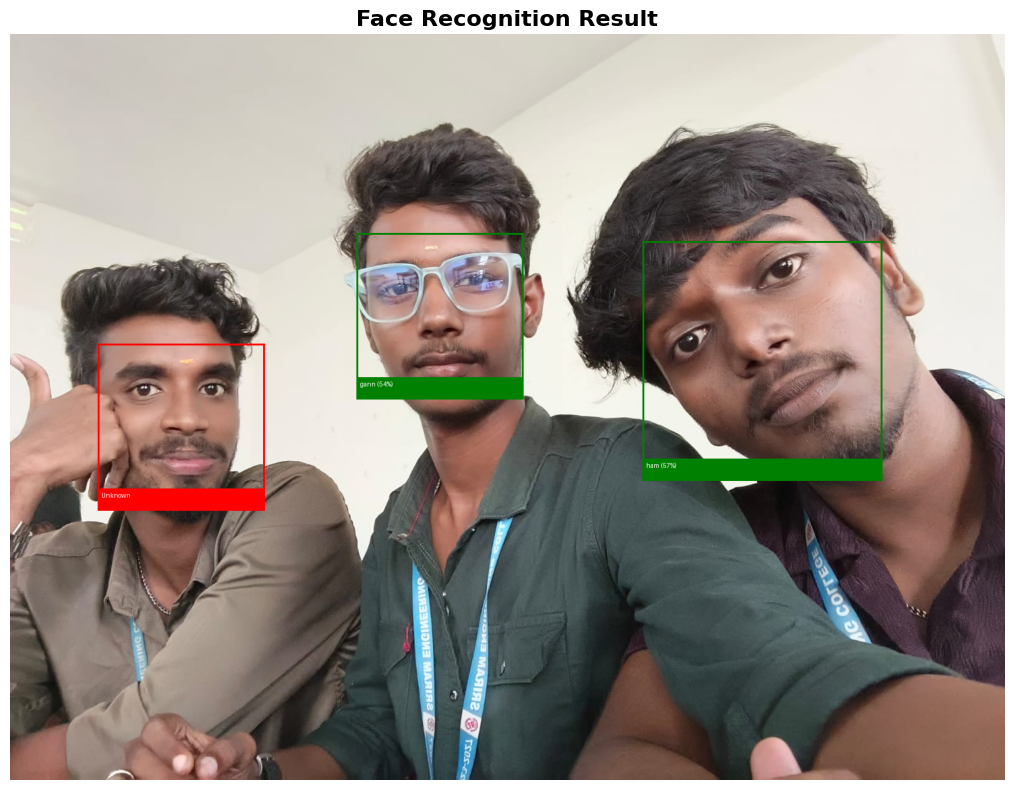


📋 FINAL SUMMARY:
✅ Person 1: gann (54.1% confident)
❌ Person 2: Unknown
✅ Person 3: ham (57.1% confident)


In [8]:
# Cell 5: Recognize faces in test image

# Change this to your test image name
test_image = "/content/test_images/WhatsApp Image 2026-01-22 at 7.18.32 AM.jpeg"

results = fr.recognize_image(test_image)

print("\n📋 FINAL SUMMARY:")
print("=" * 60)
for i, result in enumerate(results, 1):
    status = "✅" if result['name'] != "Unknown" else "❌"
    print(f"{status} Person {i}: {result['name']}", end="")
    if result['confidence'] > 0:
        print(f" ({result['confidence']:.1f}% confident)")
    else:
        print()
print("=" * 60)

🧪 Testing all images...

Found 1 test images


🔍 Analyzing: test_images/WhatsApp Image 2026-01-22 at 7.18.32 AM.jpeg
------------------------------------------------------------
👥 Found 3 face(s)

✅ Face 1: gann (Confidence: 54.1%)
❌ Face 2: Unknown
✅ Face 3: ham (Confidence: 57.1%)



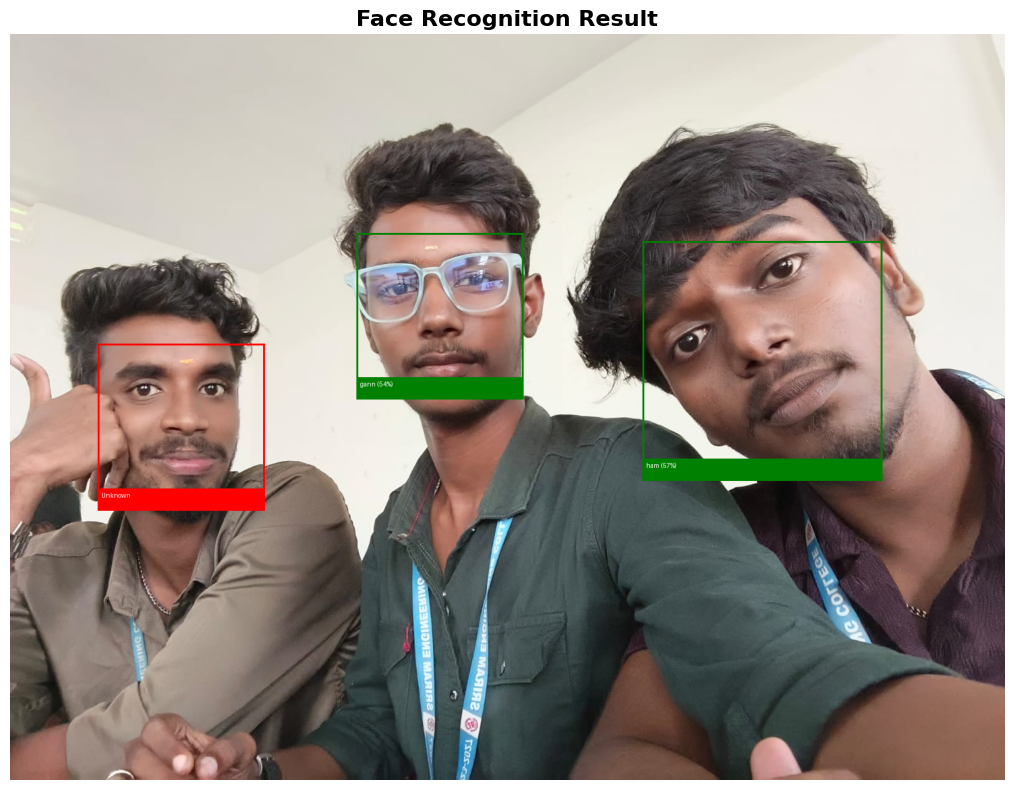


--------------------------------------------------------------------------------



In [9]:
import os

print("🧪 Testing all images...\n")

test_folder = "test_images"
test_files = [f for f in os.listdir(test_folder)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(test_files)} test images\n")

for test_file in test_files:
    test_path = os.path.join(test_folder, test_file)
    fr.recognize_image(test_path)
    print("\n" + "-" * 80 + "\n")